In [40]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.10.0


In [41]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print(train_labels.shape)
order = np.argsort(np.random.random(train_labels.shape))
print(np.random.random(train_labels.shape))
print(order)

(404,)
[ 0.73541945  0.76855524  0.06650941  0.87936262  0.98446666  0.95646803
  0.0557069   0.23608721  0.92689035  0.79098896  0.60556978  0.37370977
  0.63054626  0.27056101  0.54662009  0.68439432  0.98089573  0.21689642
  0.83156077  0.17620774  0.74950968  0.444637    0.48410081  0.0345767
  0.83933452  0.22575265  0.24768062  0.41963141  0.37793192  0.66345517
  0.54719216  0.67148876  0.74522824  0.18568376  0.64886368  0.18689671
  0.3973462   0.37598998  0.3692389   0.87607339  0.70402946  0.72830724
  0.24175013  0.36670369  0.49484236  0.73813205  0.47534901  0.39835837
  0.53921361  0.21841442  0.6008202   0.66640808  0.81975376  0.37411547
  0.75151728  0.31843207  0.89765794  0.79567661  0.8076789   0.32908028
  0.12154582  0.16430127  0.97501655  0.53563835  0.88531435  0.89632771
  0.47145144  0.82080192  0.85096928  0.57185777  0.52838955  0.68484691
  0.52890892  0.28283782  0.43093966  0.95367671  0.34698335  0.99649348
  0.57088255  0.30784127  0.31627331  0.42887

In [42]:
train_data = train_data[order]
train_labels = train_labels[order]

In [43]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

"""
1. Per capita crime rate.
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.

"""

print(train_data[0])

Training set: (404, 13)
Testing set: (102, 13)
[  7.87500000e-02   4.50000000e+01   3.44000000e+00   0.00000000e+00
   4.37000000e-01   6.78200000e+00   4.11000000e+01   3.78860000e+00
   5.00000000e+00   3.98000000e+02   1.52000000e+01   3.93870000e+02
   6.68000000e+00]


In [44]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [45]:
print(train_labels[0:10])

[ 32.   27.5  32.   23.1  50.   20.6  22.6  36.2  21.8  19.5]


In [46]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean ) / std

print(train_data[0])
print(train_data.shape[1])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]
13


In [47]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [48]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])




....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

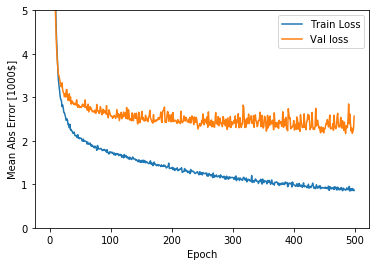

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label='Val loss')
    plt.legend()
    plt.ylim([0,5])
    
plot_history(history)


....................................................................................................
...............................

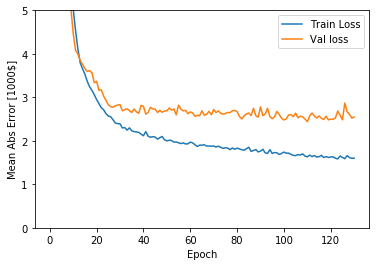

In [55]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [56]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2699.05


In [53]:
test_prediction = model.predict(test_data).flatten()
print(test_prediction)

[ 11.88537216  20.12720108  21.50247383  34.15927505  25.24501228
  23.60725975  27.20299149  22.56785011  20.11530876  22.0111599
  27.65670204  18.3610096   16.68855476  43.74160004  22.72853279
  21.16569328  26.53652     18.45672417  21.87487984  24.2385807
  13.34291935  11.89369392  21.38187599  15.73940849  17.70970726
  25.86859131  29.24379158  27.77734375  13.67850113  20.27475929
  20.77145004  17.52841187  36.18510437  24.49043083  21.78607178
  11.56986809  19.86345673  17.12889862  22.98501015  25.68466759
  33.29699707  30.27225876  14.43071747  43.04741669  31.80180931
  29.29329491  28.93481255  21.42464066  23.17864609  22.93047905
  35.23495483  22.43012428  11.56385422  14.88085842  37.35644531
  29.25415993  12.62219429  52.38817596  36.29253387  26.80215263
  23.21837044  14.87597847  18.22122002  21.08293724  24.02456856
  20.81066895  16.77375221  22.66168022  11.54550934  10.79693127
  24.82691765  29.67645264  27.37280846  11.70012474  25.78861427
  19.0687007